In [8]:
import pandas as pd
import numpy as np
import math

df1 = pd.read_csv('Sheet1_v2.csv', dtype=np.float64)

df2 = pd.read_csv('Sheet2_v2.csv', dtype=np.float64)

print(f'Mean {df1.mean()}')
print(f'Variance {df1.var()}')
print(f'SDM {(df1.var())**0.5}')
print(f'p_max {1/((df1.var())**0.5 * (2 * math.pi)**0.5)}', end='\n\n')


print(f'Mean {df2.mean()}')
print(f'Variance {df2.var()}')
print(f'SDM {(df2.var())**0.5}')
print(f'p_max {1/((df2.var())**0.5 * (2 * math.pi)**0.5)}', end='\n\n')

print(f'Min in {df1.min()}')
print(f'Max in {df1.max()}', end='\n\n')

print(f'Min in {df2.min()}')
print(f'Max in {df1.max()}', end='\n\n')

Mean first_method    5.011574
dtype: float64
Variance first_method    0.019911
dtype: float64
SDM first_method    0.141105
dtype: float64
p_max first_method    2.827275
dtype: float64

Mean second_method    4.985185
dtype: float64
Variance second_method    0.039851
dtype: float64
SDM second_method    0.199628
dtype: float64
p_max second_method    1.998428
dtype: float64

Min in first_method    4.71
dtype: float64
Max in first_method    5.44
dtype: float64

Min in second_method    4.44
dtype: float64
Max in first_method    5.44
dtype: float64



In [14]:
def bin_size(data_frame):
    return (data_frame.max() - data_frame.min())/10

print(bin_size(df1))
print(bin_size(df2))

import seaborn as sns
import numpy as np

counts1, bins1 = np.histogram(df1, bins=10, density=False)

print(f'{counts1=} \n {bins1=}')


counts2, bins2 = np.histogram(df2, bins=10, density=False)

print(f'{counts2=} \n {bins2=}')


first_method    0.073
dtype: float64
second_method    0.103
dtype: float64
counts1=array([ 8,  6, 13, 30, 21, 14,  9,  4,  1,  2], dtype=int64) 
 bins1=array([4.71 , 4.783, 4.856, 4.929, 5.002, 5.075, 5.148, 5.221, 5.294,
       5.367, 5.44 ])
counts2=array([ 3,  2,  5, 16, 19, 24, 22,  9,  5,  3], dtype=int64) 
 bins2=array([4.44 , 4.543, 4.646, 4.749, 4.852, 4.955, 5.058, 5.161, 5.264,
       5.367, 5.47 ])
11


[Text(0, 0, '4.7465'),
 Text(1, 0, '4.8195'),
 Text(2, 0, '4.8925'),
 Text(3, 0, '4.9655'),
 Text(4, 0, '5.0385'),
 Text(5, 0, '5.1115'),
 Text(6, 0, '5.1845'),
 Text(7, 0, '5.2575'),
 Text(8, 0, '5.3305'),
 Text(9, 0, '5.4035')]

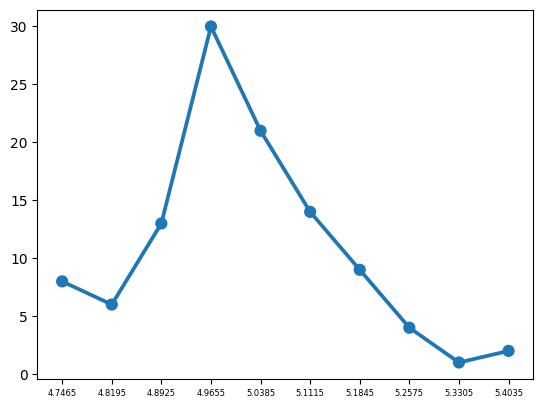

In [32]:
def middle_coords(bins):
    result = []
    for i in range(0, len(bins) - 1):
        result.append(round((bins[i] + bins[i + 1])/2, 4))
    return pd.Series(result)
    
# print(middle_coords(bins1))
ax = sns.pointplot(x=middle_coords(bins1), y=counts1)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)



[Text(0, 0, '4.4915'),
 Text(1, 0, '4.5945'),
 Text(2, 0, '4.6975'),
 Text(3, 0, '4.8005'),
 Text(4, 0, '4.9035'),
 Text(5, 0, '5.0065'),
 Text(6, 0, '5.1095'),
 Text(7, 0, '5.2125'),
 Text(8, 0, '5.3155'),
 Text(9, 0, '5.4185')]

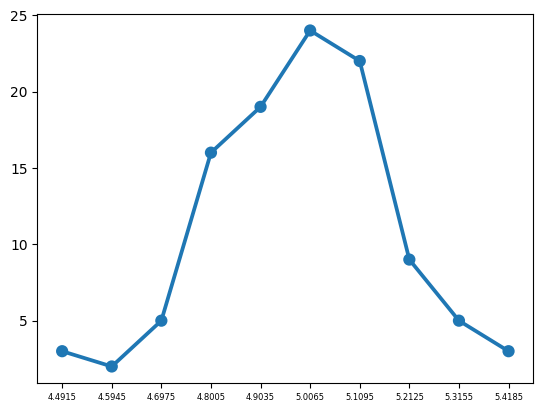

In [33]:
ax = sns.pointplot(x=middle_coords(bins2), y=counts2)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)

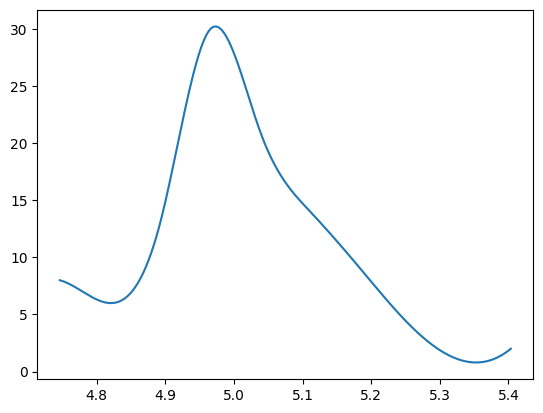

In [25]:

import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
 
# Dataset
x = middle_coords(bins1)
y = counts1
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
# plt.xlabel("X")
# plt.ylabel("Y")
plt.show()

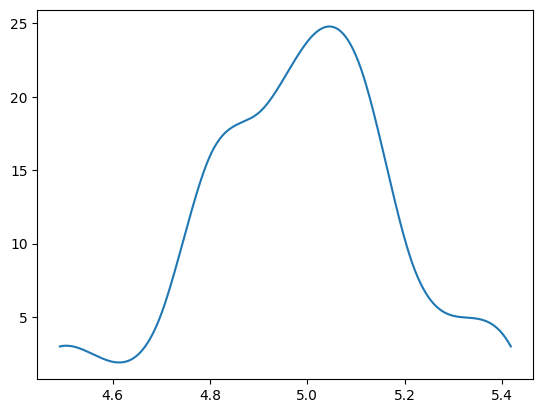

In [34]:
x = middle_coords(bins2)
y = counts2
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
# plt.xlabel("X")
# plt.ylabel("Y")
plt.show()

In [10]:
import seaborn

merged_df = pd.concat([df1, df2], axis=1)




<Axes: xlabel='first_method', ylabel='Count'>

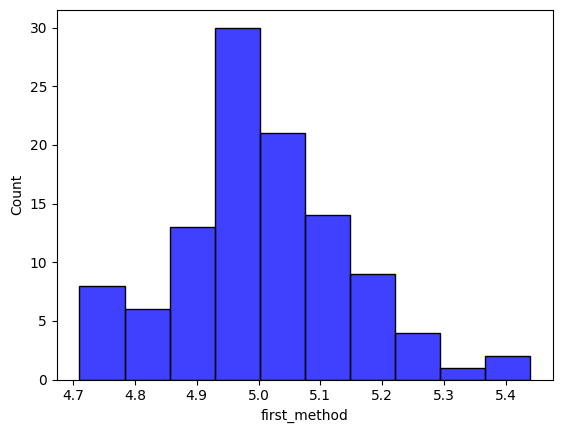

In [11]:
seaborn.histplot(data=merged_df,x='first_method', kde=False, color='blue',bins=10)


<Axes: xlabel='second_method', ylabel='Count'>

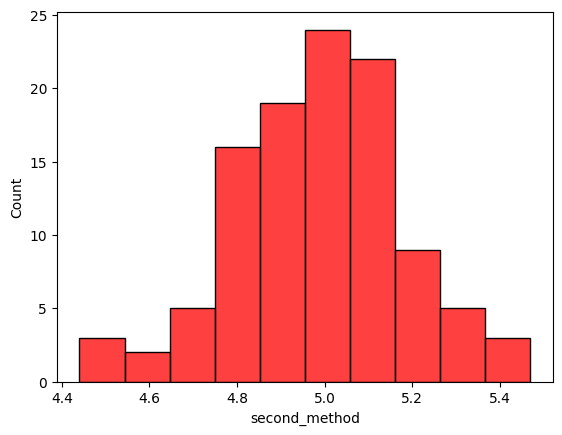

In [12]:
seaborn.histplot(data=merged_df,x='second_method', kde=False, color='red',bins=10)
